<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring2024/linear_regression_with_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#We are covering neural nets from https://www.cmpe.boun.edu.tr/~ethem/i2ml3e/3e_v1-0/i2ml3e-chap11.pdf
# The notation is as follows:
# X is the matrix that holds the feature values (n examples in rows and d dimensions/predictors/features/independent-variables in columns)
# r is the expected value (aka. target/dependent-variable) that needs to be predicted (given the features for that example)
# y is the prediction, obtained by a weighted sum of the features, each feature has a weight and we also have w0 for the bias (intercept)
# y = mx + c, in our model here because we choose to model the relationship between X ad r as linear.
# Because of occam's razor: linear is a good fit, a constant (average car price) is underfitting, and fifth degree polynomial is too wiggly and hard to explain ups and downs.
# r-y (or equivalently, y_true-y_pred) is the error (or residual), typically square of which needs to be made as small as possible, indicating optimality of the weights

import pandas as pd
import numpy as np

# Let's create a dataset with one feature and a target variable.
# We'll create a simple linear relationship between them.

np.random.seed(0)  # For reproducibility

# Generate a synthetic dataset with 100 data points
num_points = 100
X = 2.5 * np.random.randn(num_points) + 1.5   # Array of values with mean = 1.5, stddev = 2.5 (let's start with a single predictor)
res = 0.5 * np.random.randn(num_points)       # Generate residual terms for each example
r = y_true = 2 + 0.3 * X + res          # Actual values of the dependent variable (with the textbook's notation this corresponds to r)

#so from this synthetic dataset formula, we expect the NN learn w1=0.3 and w0=2
# Create a pandas DataFrame
dataset = pd.DataFrame({
    'X': X,
    'r': y_true
})

dataset.head(10)


,X,r
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107
5,-0.943195,2.688852
6,3.875221,2.955757
7,1.121607,1.962755
8,1.241953,3.334057
9,2.526496,3.498206


In [ ]:
dataset.iloc[9]

X    2.526496
r    3.498206
Name: 9, dtype: float64

Text(0, 0.5, 'r')

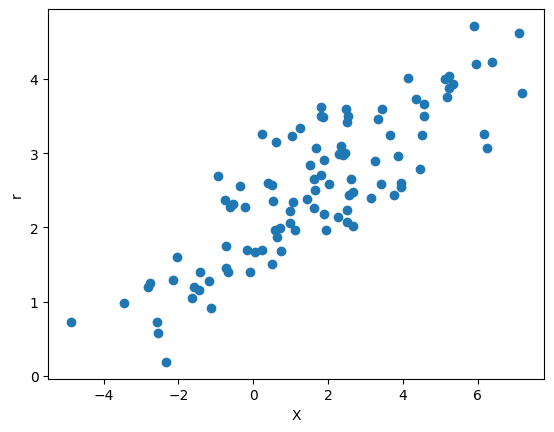

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataset['X'], dataset['r'])
plt.xlabel('X')
plt.ylabel('r')

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Define the model (and initialize the weights, specifically w and w0 for the simple linear regression task that we are studying)
model = keras.Sequential([
    layers.Dense(1, input_shape=(1,)),  # Having 1 output unit and input shape is 1 (only one feature), we don't use activation because it is a regression problem.
])
weights, bias = model.get_weights() #randomly initialized
print(weights, bias)


[[-0.65746343]] [0.]


In [ ]:
# Fit the model to the dataset optimizing for the selected loss

#use a combination that works for the particulars of the problem, say classification vs regression

model.compile(optimizer='sgd', loss='mean_absolute_error')
#model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
weights, bias = model.get_weights() #initially
print(weights)

model.fit(X, y_true, epochs=10, verbose=0)
weights, bias = model.get_weights() #after some updates (say 10 epochs)
print(weights)

model.fit(X, y_true, epochs=10, verbose=0)
weights, bias = model.get_weights() #after some more updates (say 10 more epochs)
print(weights)


model.fit(X, y_true, epochs=200, verbose=1, initial_epoch=20) #lets run it for long, set initial epoch to 20 for bookkeeping purposes


[[-0.65746343]]
[[0.09025063]]
[[0.58928496]]
Epoch 21/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9795
Epoch 22/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9638
Epoch 23/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9448
Epoch 24/200
4/4 [==============================] - 0s 7ms/step - loss: 0.9293
Epoch 25/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9143
Epoch 26/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8976
Epoch 27/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8850
Epoch 28/200
4/4 [==============================] - 0s 13ms/step - loss: 0.8693
Epoch 29/200
4/4 [==============================] - 0s 6ms/step - loss: 0.8483
Epoch 30/200
4/4 [==============================] - 0s 11ms/step - loss: 0.8318
Epoch 31/200
4/4 [==============================] - 0s 2ms/step - loss: 0.8181
Epoch 32/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8027
Epoc

4/4 [==============================] - 0s 5ms/step


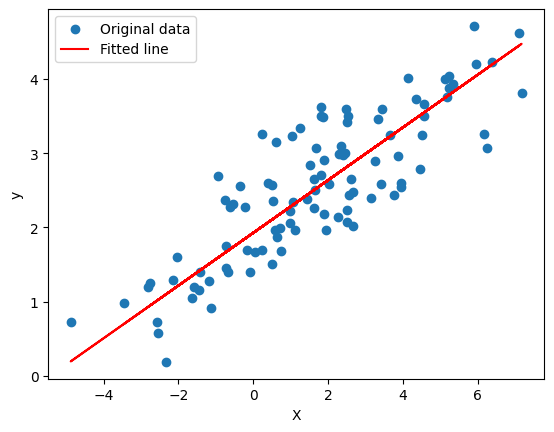

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions for the input data
y_pred = model.predict(X)

# Plotting the scatter plot of original data
plt.scatter(X, y_true, label='Original data')

# Plotting the regression line
plt.plot(X, y_pred, color='red', label='Fitted line')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show plot
plt.show()


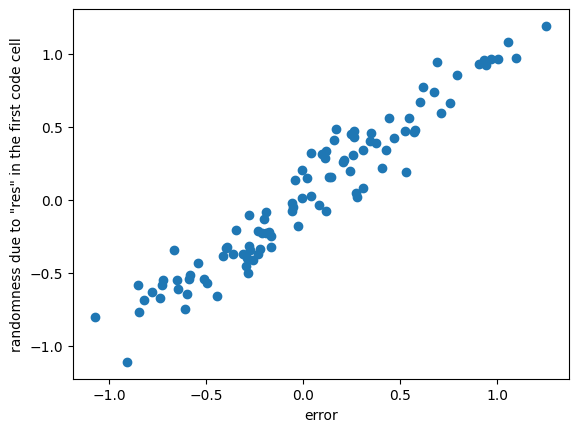

In [ ]:
plt.scatter(y_true - y_pred.flatten(), res)
plt.xlabel('error')
plt.ylabel('randomness due to "res" in the first code cell');


y_true_test=[2.0, 1.7]
y_true_test=[2.0, 1.7]
y_true_test=array([[2. ],
       [1.7]])
y_pred=array([[1.9262512],
       [1.5712094]], dtype=float32)


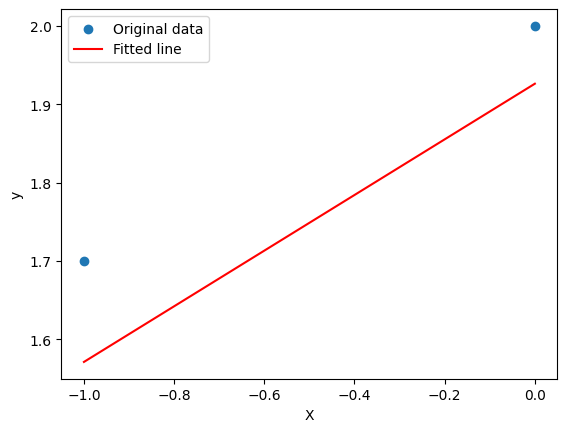

In [ ]:
#We can do this check/verification/testing for the test examples, too

#Generate some new examples
sample1 = [0]
sample2 = [-1]
X_test= [sample1, sample2]

#or just put it in a 2d-array where the rows are new test examples and the columns are (only one here) features
X_test= [[0],
         [-1]]

y_true_test = [0.3*0 + 2, 0.3*-1 + 2]  #make sure you go over each test example and multiply X by 0.3 and then add 2
print(f'{y_true_test=}')

y_true_test = []
for sample in X_test:
    y_true_test.append(sample[0]*0.3+2)
print(f'{y_true_test=}')

y_true_test = np.multiply(X_test, 0.3) + 2
print(f'{y_true_test=}')


# predictions for the input data
y_pred = model.predict(X_test, verbose=0)
print(f'{y_pred=}')


# Plotting the scatter plot of original data
plt.scatter(X_test, y_true_test, label='Original data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', label='Fitted line')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show plot
plt.show();
